In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
boston=load_boston()

In [33]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [35]:
print(boston.data.shape)

(506, 13)


In [36]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [38]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y=pd.DataFrame(boston['target'],columns=['Price'])

In [19]:
y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [39]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


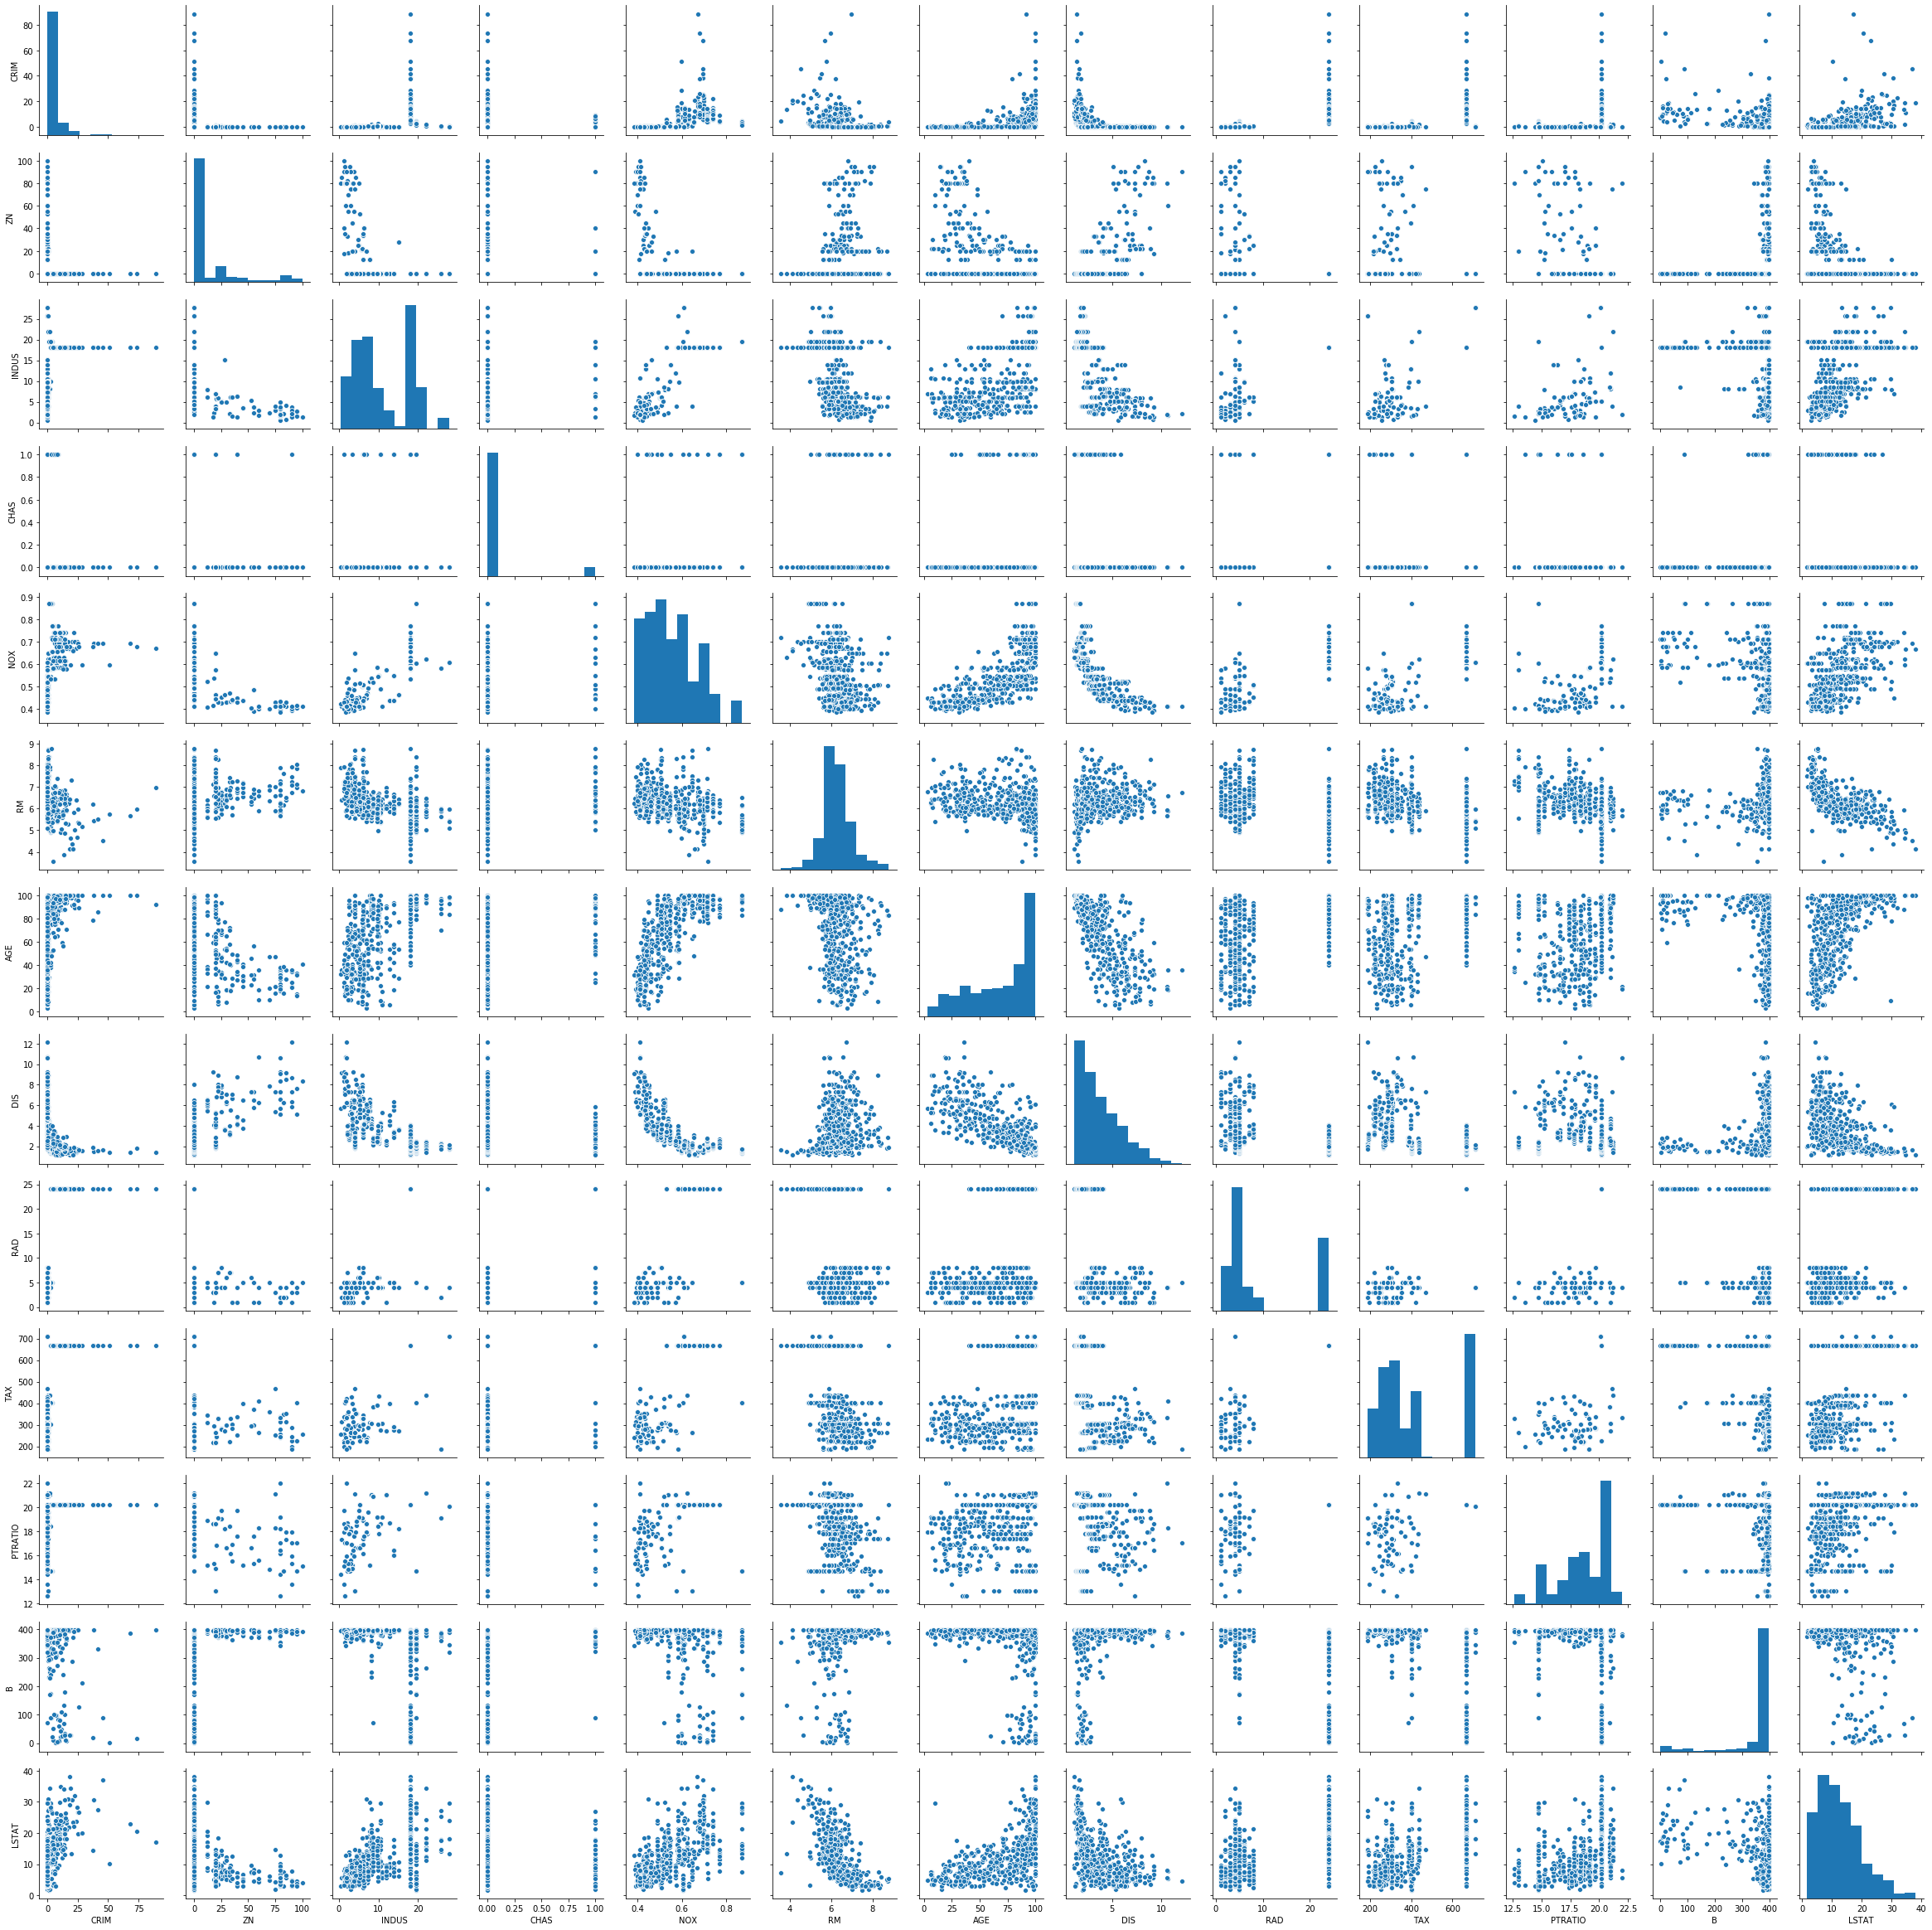

In [41]:
sns.pairplot(X)

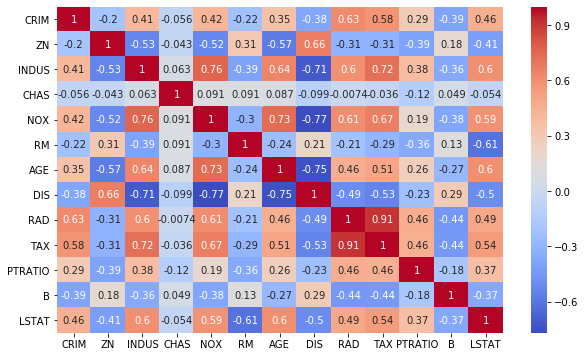

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)

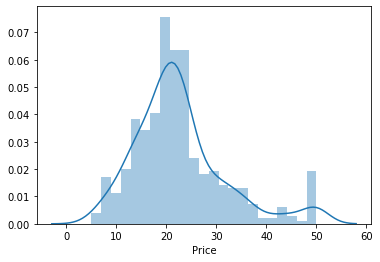

In [46]:
sns.distplot(y['Price'])

#### splitting the dataset into train and test sets

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

_____
## Training the model-- LINEAR REGRESSION
______

In [23]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lm.intercept_) #Set to 0.0 if fit_intercept = False.

[30.24675099]


In [30]:
coeff_df = pd.DataFrame(lm.coef_.reshape(13,1),X.columns,columns=['Coefficient'])

In [31]:
coeff_df

,Coefficient
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


#####  keeping other features constant,Increasing every feature( say CRIM ) by 1 unit will increase/decrease(given the sign) the price by said coefficient(say decrease of 0.11).

#### predicting the test data 

In [47]:
predict= lm.predict(X_test)

Text(0.5, 1.0, 'Actual Prices vs Predicted prices--> $Y_i$ vs $\\hat{Y}_i$')

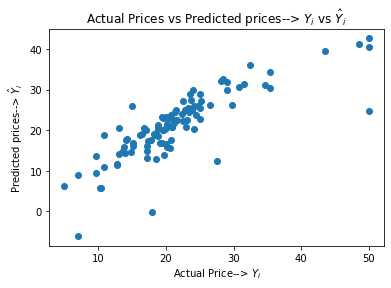

In [51]:
plt.scatter(y_test,predict)
plt.xlabel("Actual Price--> $Y_i$")
plt.ylabel("Predicted prices--> $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices--> $Y_i$ vs $\hat{Y}_i$")

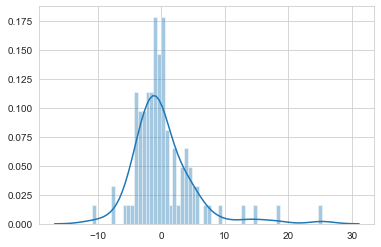

In [59]:
sns.set_style('whitegrid')
sns.distplot((y_test-predict),bins=60);

#### Residuals are not normally distrubted finely,

#### Model evaluation

In [63]:
print('Mean absolute error: ',mean_absolute_error(y_test,predict))
print('Mean square error: ',mean_squared_error(y_test,predict))
print('Root Mean square error: ',np.sqrt(mean_squared_error(y_test,predict)))

Mean absolute error:  3.189091965887878
Mean square error:  24.29111947497383
Root Mean square error:  4.928602182665368


In [64]:
y.mean()

Price    22.532806
dtype: float64

In [65]:
predicted_values=pd.DataFrame(predict,columns=['predicted values'])

In [68]:
predicted_values.head()

,predicted values
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880


In [69]:
y_test.head()

,Price
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
